In [1]:
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


In [57]:
.libPaths(c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib"), .libPaths()))
library(SparkR)

In [58]:
library(SparkR, lib.loc = c(file.path(Sys.getenv("SPARK_HOME"), "R", "lib")))


In [59]:
sparkR.session(
               enableHiveSupport = TRUE ,
               master = "local[*]", 
               sparkHome = Sys.getenv("SPARK_HOME") , # this was the missing link!!
               sparkConfig = 
                 list(spark.driver.memory = "2g", 
                      spark.sql.warehouse.dir="C:\\Apps\\winutils\\winutils-master\\hadoop-2.7.1") # winutils path directory
    
)
# works only when we open jupyter notebook is opened from default C drive

Java ref type org.apache.spark.sql.SparkSession id 1 

In [60]:
sparkR.uiWebUrl()

[1] "http://User-PC:4040"

In [61]:
df <- as.DataFrame(faithful)
str(df)

'SparkDataFrame': 2 variables:
 $ eruptions: num 3.6 1.8 3.333 2.283 4.533 2.883
 $ waiting  : num 79 54 74 62 85 55


In [62]:
colnames(df)

[1] "eruptions" "waiting"

In [63]:
createOrReplaceTempView(df, "df")

In [64]:
waiting_70 <- SparkR::sql("select * from df where waiting > 70")
str(waiting_70)

'SparkDataFrame': 2 variables:
 $ eruptions: num 3.6 3.333 4.533 4.7 3.6 4.35
 $ waiting  : num 79 74 85 88 85 85


In [65]:
head(SparkR::collect(waiting_70), 10)

eruptions,waiting
3.600,79
3.333,74
4.533,85
4.700,88
3.600,85
4.350,85
3.917,84
4.200,78
4.700,83
4.800,84


In [66]:
SparkR::collect(SparkR::summary(df))


summary,eruptions,waiting
count,272,272
mean,3.4877830882352936,70.8970588235294
stddev,1.1413712511052083,13.594973789999392
min,1.6,43.0
25%,2.15,58.0
50%,4.0,76.0
75%,4.45,82.0
max,5.1,96.0


In [67]:
SparkR::corr(df, "waiting", "eruptions")


[1] 0.9008112

`geom_smooth()` using method = 'loess'


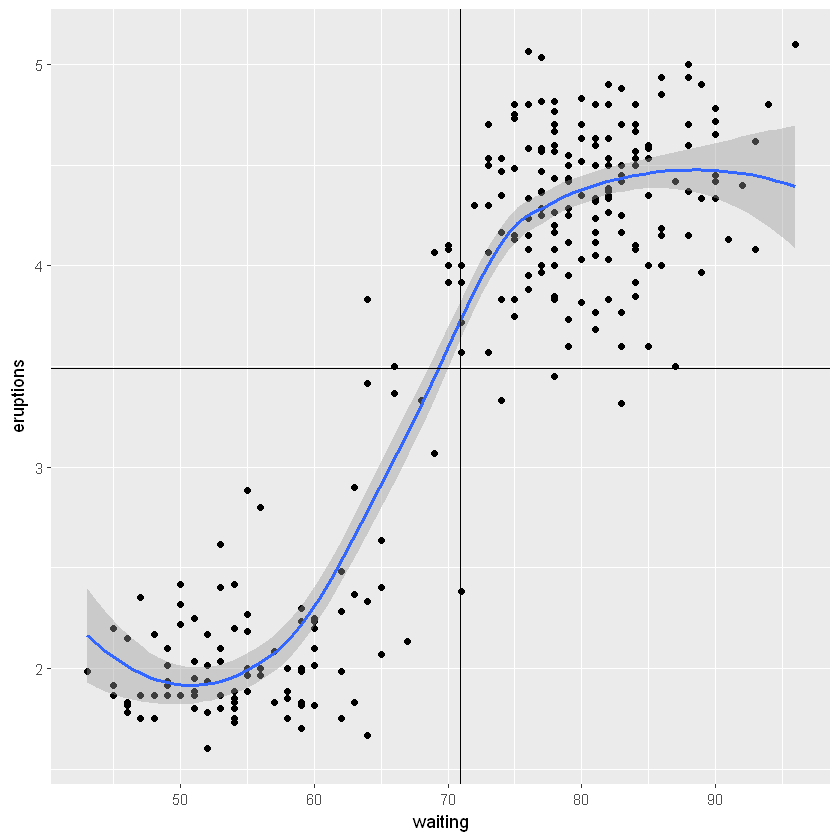

In [68]:
waiting_avg <- SparkR::select(df, SparkR::mean(df$waiting)) %>% SparkR::collect()
eruptions_avg <- SparkR::select(df, SparkR::mean(df$eruptions)) %>% SparkR::collect()
df %>% SparkR::collect() %>%
  ggplot(aes(x = waiting, y = eruptions)) +
  geom_point() +
  geom_smooth() +
  geom_vline(xintercept = waiting_avg$`avg(waiting)`) +
  geom_hline(yintercept = eruptions_avg$`avg(eruptions)`)

In [71]:
people <- read.df("C:/Apps/Apache/Spark/spark-2.3.0/examples/src/main/resources/people.json", "json")
head(people)

age,name
NA,Michael
30,Andy
19,Justin
